In [31]:
import os
import pandas as pd
import numpy as np
train_df = pd.read_csv("train.csv")
test_df  = pd.read_csv("test.csv") # while we are at it, lets also grab the test dataframe
# lets see the dataframe
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(train_df.dtypes)  # here are the datatypes, for objects we need to do some feature engineering
print(train_df.columns) # possible features to consider

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
# we notice for age we have NaN, so we need to use imputation through pandas mean()
train_df.fillna(train_df.mean(), inplace = True)
print(train_df)
# lets do the same for our test data
test_df.fillna(test_df.mean(), inplace = True)
print(test_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [5]:
# name length
def get_name_len(df):
    name_list = []
    for name in df["Name"]:
        if len(name) <= 20:
            name_list.append(1)
        elif len(name) <= 35:
            name_list.append(2)
        elif len(name) <= 45:
            name_list.append(3)
        else:
            name_list.append(4)
    return name_list
        
train_df['NameLength'] = get_name_len(train_df)
test_df['NameLength']  = get_name_len(test_df)

In [6]:
# there are also NaN values for the Cabin so we are going to have to change that
# Turning cabin number into Deck numerals for training
import math
# preprocess the cabin list
def get_cabin_list(df):
    cabin_list = []
    deck_to_number = { 'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'T':6, 'G':7, 'Unknown':8 }
    for cabin in df["Cabin"].values:
        if isinstance(cabin, float): # check if the value is missing NaN is seen as float by interpreter
            cabin_list.append(deck_to_number['Unknown'])
        else:
            for deck in ['A','B','C','D','E','F','T','G']:
                if deck in cabin:
                    cabin_list.append(deck_to_number[deck])
                    break
    return cabin_list
# lets print the results
print("train dataframe")
print(get_cabin_list(train_df))
print("test dataframe")
print(get_cabin_list(test_df))

# update these preprocessed results back into our training and test dataframes
train_cabin_column = pd.DataFrame({"Cabin":get_cabin_list(train_df)})
train_df.update(train_cabin_column)
print(train_df)

test_cabin_column = pd.DataFrame({"Cabin":get_cabin_list(test_df)})
test_df.update(test_cabin_column)
print(test_df)

train dataframe
[8, 2, 8, 2, 8, 8, 4, 8, 8, 8, 7, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 0, 8, 8, 8, 2, 8, 8, 8, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 1, 2, 8, 8, 8, 8, 8, 1, 2, 8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 8, 8, 8, 4, 8, 8, 8, 0, 3, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 2, 8, 8, 8, 8, 8, 8, 8, 1, 8, 8, 8, 8, 4, 3, 8, 8, 8, 4, 8, 8, 8, 8, 8, 8, 8, 3, 2, 8, 1, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 8, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 8, 8, 8, 1, 8, 8, 8, 0, 8, 8, 2, 8, 8, 8, 8, 8, 5, 8, 0, 8, 8, 8, 8, 8, 8, 8, 5, 1, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 0, 8, 8, 8, 8, 8, 3, 8, 8, 3, 8, 8, 8, 8, 8, 2, 8, 8, 8, 8, 8, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 8, 8, 3, 8, 8, 7, 2, 8, 8, 8, 8, 1, 8, 8, 8, 8, 4, 1, 8, 8, 8, 8, 2, 2, 8, 8, 8, 2, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 8, 8, 8, 1, 3, 8, 8, 8, 8, 2, 2, 1, 8, 8, 8, 4, 8, 2, 8, 2, 8, 4, 2, 1, 8, 8, 8, 8, 8, 8, 2, 4, 8, 8, 8, 8, 8, 2, 8, 3,

In [7]:
# lets preprocess the sex for both the testing and training dataframes
sex_to_numeral = {'female':1, 'male':0}
def get_sex_list(df):
    ret = []
    for sex in df["Sex"].values:
        ret.append(sex_to_numeral[sex])
    return ret

train_sex_column = pd.DataFrame({"Sex":get_sex_list(train_df)})
test_sex_column = pd.DataFrame({"Sex":get_sex_list(test_df)})
train_df.update(train_sex_column)
test_df.update(test_sex_column)
print(train_df)
print(test_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [8]:
# lets preprocess the names of the passengers just into their titles as numerals
title_to_numeral = {'Mrs':0, 'Mr':1, 'Master':2, 'Miss':3, 'Major':4, 'Rev':5,
                    'Dr':6, 'Ms':7, 'Mlle':8,'Col':9, 'Capt':10, 'Mme':11, 'Countess':12,
                    'Don':13, 'Jonkheer':14}
def get_title_list(df):
    title_list = []
    for name in df['Name'].values:
        for title in ['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']:
            if title in name:
                title_list.append(title_to_numeral[title])
                break;
    return title_list
                
# print(get_title_list(train_df))
train_df.update(pd.DataFrame({"Name":get_title_list(train_df)}))
test_df.update(pd.DataFrame({"Name":get_title_list(test_df)}))
print(train_df)
print(test_df)

     PassengerId  Survived  Pclass Name Sex        Age  SibSp  Parch  \
0              1         0       3    1   0  22.000000      1      0   
1              2         1       1    0   1  38.000000      1      0   
2              3         1       3    3   1  26.000000      0      0   
3              4         1       1    0   1  35.000000      1      0   
4              5         0       3    1   0  35.000000      0      0   
5              6         0       3    1   0  29.699118      0      0   
6              7         0       1    1   0  54.000000      0      0   
7              8         0       3    2   0   2.000000      3      1   
8              9         1       3    0   1  27.000000      0      2   
9             10         1       2    0   1  14.000000      1      0   
10            11         1       3    3   1   4.000000      1      1   
11            12         1       1    3   1  58.000000      0      0   
12            13         0       3    1   0  20.000000      0   

In [9]:
# preprocess embarked
print(train_df["Embarked"].values)

embarked_to_numerals = {'S':0, 'C':1, 'Q':2, 'N':3}
def get_embarked_numerals(df):
    embarked_numerals = []
    for embarked in df['Embarked'].values:
        if isinstance(embarked, float):
            embarked_numerals.append(embarked_to_numerals['N'])
        else:
            embarked_numerals.append(embarked_to_numerals[embarked])
    return embarked_numerals
            
train_df.update(pd.DataFrame({"Embarked":get_embarked_numerals(train_df)}))
test_df.update(pd.DataFrame({"Embarked":get_embarked_numerals(test_df)}))
print(train_df)

['S' 'C' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S'
 'S' 'C' 'S' 'S' 'Q' 'S' 'S' 'S' 'C' 'S' 'Q' 'S' 'C' 'C' 'Q' 'S' 'C' 'S'
 'C' 'S' 'S' 'C' 'S' 'S' 'C' 'C' 'Q' 'S' 'Q' 'Q' 'C' 'S' 'S' 'S' 'C' 'S'
 'C' 'S' 'S' 'C' 'S' 'S' 'C' nan 'S' 'S' 'C' 'C' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'Q' 'S' 'C' 'S' 'S' 'C' 'S' 'Q' 'S' 'C' 'S' 'S' 'S' 'C' 'S' 'S' 'C'
 'Q' 'S' 'C' 'S' 'C' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'Q'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S' 'S' 'C' 'S' 'S' 'C' 'S' 'S'
 'S' 'C' 'S' 'S' 'S' 'S' 'Q' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'C' 'C' 'Q' 'S'
 'Q' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'Q' 'C' 'S' 'S' 'S' 'S' 'Q' 'C'
 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'C' 'Q' 'S

In [10]:
spread = pd.DataFrame(data={"a":[1,2,3,4,5,6], "b":[2,3,4,5,6,7]})
print(spread)

   a  b
0  1  2
1  2  3
2  3  4
3  4  5
4  5  6
5  6  7


In [11]:
# lets do some feature engineering
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"]
train_df["AgeClass"] = train_df["Age"] * train_df["Pclass"]
train_df["FarePerPerson"] = train_df["Fare"] / (train_df["FamilySize"] + 1)
print(train_df)

test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"]
test_df["AgeClass"] = test_df["Age"] * test_df["Pclass"]
test_df["FarePerPerson"] = test_df["Fare"] / (test_df["FamilySize"] + 1)
print(train_df)

     PassengerId  Survived  Pclass Name Sex        Age  SibSp  Parch  \
0              1         0       3    1   0  22.000000      1      0   
1              2         1       1    0   1  38.000000      1      0   
2              3         1       3    3   1  26.000000      0      0   
3              4         1       1    0   1  35.000000      1      0   
4              5         0       3    1   0  35.000000      0      0   
5              6         0       3    1   0  29.699118      0      0   
6              7         0       1    1   0  54.000000      0      0   
7              8         0       3    2   0   2.000000      3      1   
8              9         1       3    0   1  27.000000      0      2   
9             10         1       2    0   1  14.000000      1      0   
10            11         1       3    3   1   4.000000      1      1   
11            12         1       1    3   1  58.000000      0      0   
12            13         0       3    1   0  20.000000      0   

In [12]:
# add a feature is_single
def get_single(df):
    single = []
    for family_size in df["FamilySize"].values:
        if family_size > 0:
            single.append(0)
        else:
            single.append(1)
    return single
        
train_df["Single"] = get_single(train_df)
test_df["Single"] = get_single(test_df)
print(train_df)

     PassengerId  Survived  Pclass Name Sex        Age  SibSp  Parch  \
0              1         0       3    1   0  22.000000      1      0   
1              2         1       1    0   1  38.000000      1      0   
2              3         1       3    3   1  26.000000      0      0   
3              4         1       1    0   1  35.000000      1      0   
4              5         0       3    1   0  35.000000      0      0   
5              6         0       3    1   0  29.699118      0      0   
6              7         0       1    1   0  54.000000      0      0   
7              8         0       3    2   0   2.000000      3      1   
8              9         1       3    0   1  27.000000      0      2   
9             10         1       2    0   1  14.000000      1      0   
10            11         1       3    3   1   4.000000      1      1   
11            12         1       1    3   1  58.000000      0      0   
12            13         0       3    1   0  20.000000      0   

In [13]:
# FareType

def get_fare_type(df):
    fare_type = []
    for fare in df["Fare"].values:
        if fare <= 4:
            fare_type.append(0)
        elif fare <= 10:
            fare_type.append(1)
        elif fare <= 20:
            fare_type.append(2)
        elif fare <= 45:
            fare_type.append(3)
        else:
            fare_type.append(4)
    return fare_type

train_df["FareType"] = get_fare_type(train_df)
test_df["FareType"] = get_fare_type(test_df)

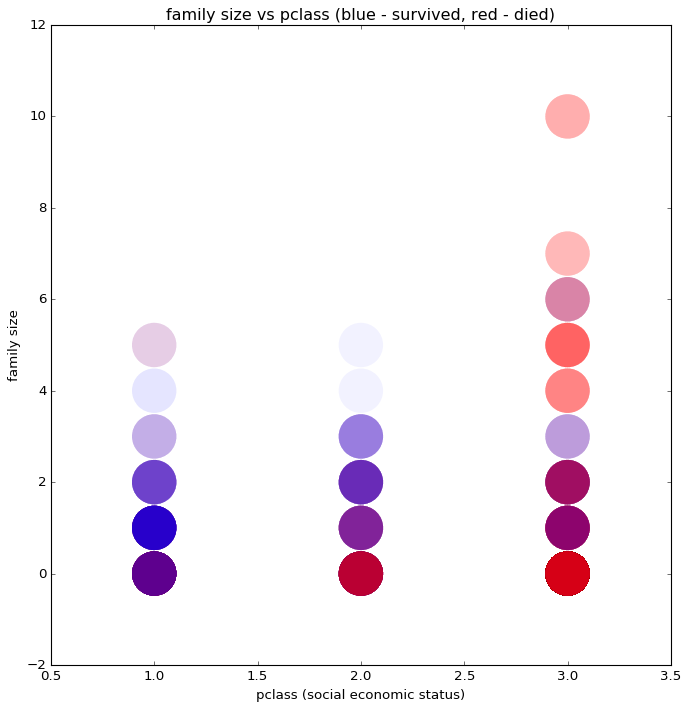

In [14]:
# after doing some preprocessing and feature engineering, lets do some data visualization
# 2d visualization of family size and class

# set up matplotlib for data visualization, the %matplotlib inline tells notebook to display
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("classic") #use the classic style for pyploy

colors = []
for outcome in train_df["Survived"].values:
    if outcome == 1:
        colors.append("blue")
    else:
        colors.append("red")

fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(train_df['Pclass'].values, train_df['FamilySize'].values, s = 1600, c = colors, alpha = 0.05, lw = 0)

plt.title("family size vs pclass (blue - survived, red - died)")
plt.ylabel("family size")
plt.xlabel("pclass (social economic status)")
plt.show()
# as we can see here pclass and family size are very good features to consider for classification

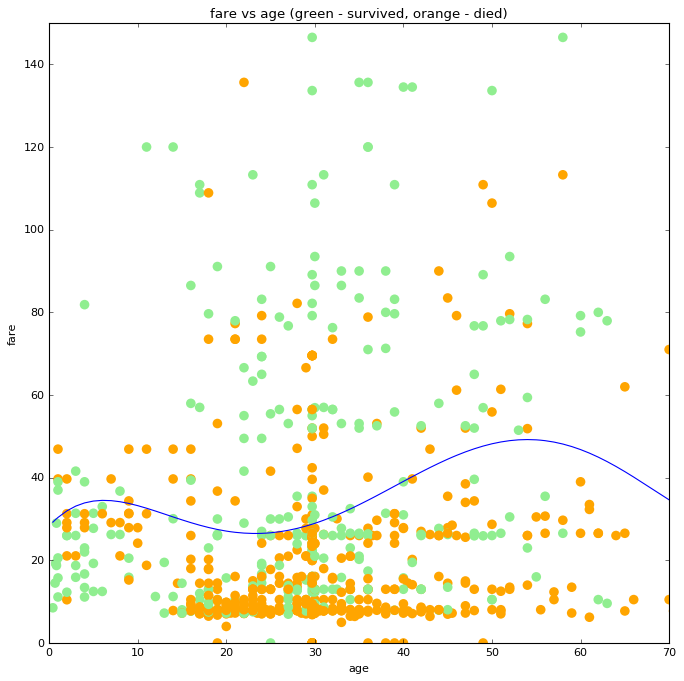

{'determination': 0.017601679786282392, 'polynomial': [7.804758230862168e-07, -0.00015677311350190137, 0.010642227424988458, -0.27667519993482254, 2.3448513869627554, 28.297350415948838]}


In [15]:
# 2d data visualization - scatter plot of age vs fare
colors = [];
age_list = train_df["Age"].values         # use as feature
fare_list = train_df["Fare"].values       # use as feature

for idx in train_df["Survived"].values:
    if train_df["Survived"].values[idx] == 1:
        colors.append("lightgreen")
    else:
        colors.append("orange")

x = age_list
y = fare_list
# set up figure to make sure things look right
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.ylim([0,150])
plt.xlim([0,70]);


plt.scatter(x, y, s = 75, c = colors, alpha = 1, lw = 0)
plt.plot(np.unique(age_list), np.poly1d(np.polyfit(age_list, fare_list, 5))(np.unique(age_list)))
plt.title("fare vs age (green - survived, orange - died)")
plt.ylabel("fare")
plt.xlabel("age")
plt.show()
# its not possible to use k nearest neighbors for this kind of data, so a CART model would be more appropriate

def fit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

print(fit(age_list, fare_list, 5))

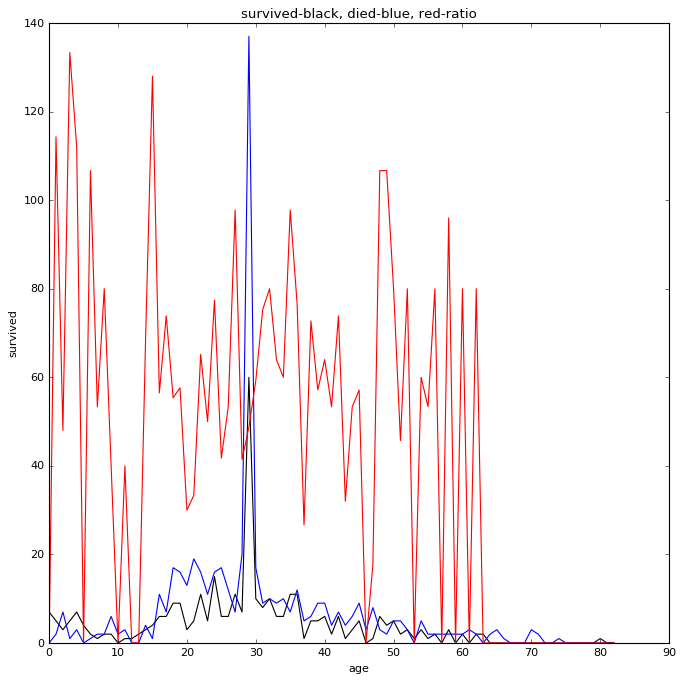

In [16]:
import numpy as np
# finally lets take a closer look at the age distribution
age_list = train_df["Age"].values
survive_freq = []
death_freq    = []
ratio = []
x = []
for i in range(0, 83):
    survive_freq.append(0)
    death_freq.append(0)
    x.append(i)

for idx in range(0, len(age_list)):
    if train_df["Survived"].values[idx] == 1:
        survive_freq[int(age_list[idx])] = survive_freq[int(age_list[idx])] + 1
    else:
        death_freq[int(age_list[idx])] = death_freq[int(age_list[idx])] + 1

for idx in range(0, len(death_freq)):
    if death_freq[idx] > 0 and survive_freq[idx] > 0: 
        ratio.append((survive_freq[idx] / (death_freq[idx] + survive_freq[idx]))*160)
    else:
        ratio.append(0)
        
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
y = survive_freq
plt.title("survived-black, died-blue, red-ratio")
plt.xlabel("age")
plt.ylabel("survived")
plt.plot(x, y, color= "black")
y = death_freq
plt.plot(x, y, color = "blue")
y = ratio
plt.plot(x, y, color = "red")
plt.show()

{'determination': 0.8914158200335006, 'polynomial': [-1.288041891553748e-05, 0.0013778259209708996, -0.04346107739484844, 0.7671786227011432]}


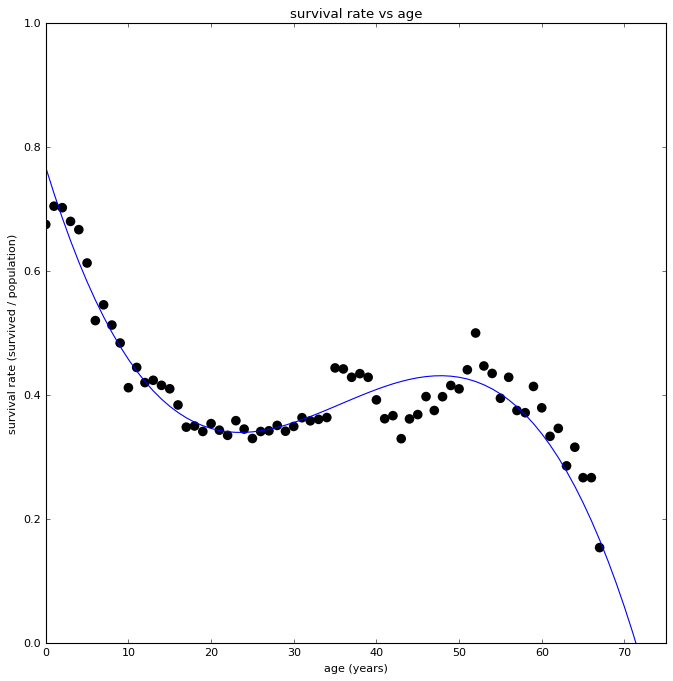

In [17]:
import numpy as np
from sklearn.metrics import r2_score
age_survive_freq = []
age_death_freq   = []
ages = []
for age in range(0, 70):
    ages.append(age)
    age_survive_freq.append(0)
    age_death_freq.append(0)
    survive_values = train_df["Survived"][abs(train_df["Age"] - age) < 5].values
    for survive in survive_values:
        if survive == True:
            age_survive_freq[age] += 1
        else:
            age_death_freq[age] += 1

colors = []
survival_ratio = []
for i in range(0, 70):
    if age_survive_freq[i] > 0:
        survival_ratio.append(float(age_survive_freq[i] / (age_survive_freq[i] + age_death_freq[i])))
        colors.append("black")
    else:
        survival_ratio.append(0)
        colors.append("white")

fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylim([0,1])
plt.xlim([0,75]);
plt.scatter(ages, survival_ratio, s = 75, c = colors, alpha = 1, lw = 0)

# lets do some investigation work
#print(np.poly1d(np.polyfit(ages, survival_ratio, 3))
plt.plot(np.unique(x), np.poly1d(np.polyfit(ages, survival_ratio, 3))(np.unique(x)))

def fit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

print(fit(ages, survival_ratio, 3));

plt.title("survival rate vs age")
plt.ylabel("survival rate (survived / population)")
plt.xlabel("age (years)")
plt.show()

max: 512.3292
min: 0.0
wtf
[143, 147, 149, 152, 158, 160, 162, 194, 198, 198, 201, 211, 216, 217, 219, 219, 222, 223, 224, 224, 228, 228, 230, 230, 230, 230, 230, 229, 179, 169, 166, 157, 153, 135, 133, 130, 120, 123, 126, 122, 117, 111, 111, 104, 102, 101, 86, 69, 66, 64, 60, 53, 52, 49, 49, 49, 47, 50, 52, 52, 54, 56, 55, 56, 60, 60, 60, 63, 63, 63, 63, 66, 63, 60, 59, 57, 55, 46, 44, 44, 43, 43, 43, 43, 42, 40, 40, 40, 40, 41, 39, 41, 40, 40, 42, 42, 41, 37, 34, 31, 25, 29, 28, 27, 23, 23, 23, 20, 20, 20, 15, 15, 13, 13, 13, 15, 17, 17, 17, 17]
[372, 377, 386, 387, 389, 397, 403, 428, 441, 443, 450, 455, 464, 465, 467, 473, 475, 476, 477, 478, 472, 473, 474, 475, 475, 473, 473, 469, 307, 245, 228, 211, 208, 182, 180, 162, 150, 145, 140, 139, 137, 128, 126, 125, 122, 115, 93, 84, 72, 70, 69, 64, 57, 55, 59, 52, 51, 50, 51, 50, 46, 45, 44, 44, 45, 45, 45, 39, 38, 38, 36, 36, 31, 31, 29, 29, 28, 26, 26, 26, 26, 26, 23, 23, 23, 23, 23, 23, 23, 24, 17, 17, 17, 17, 13, 13, 13, 13, 11, 10,

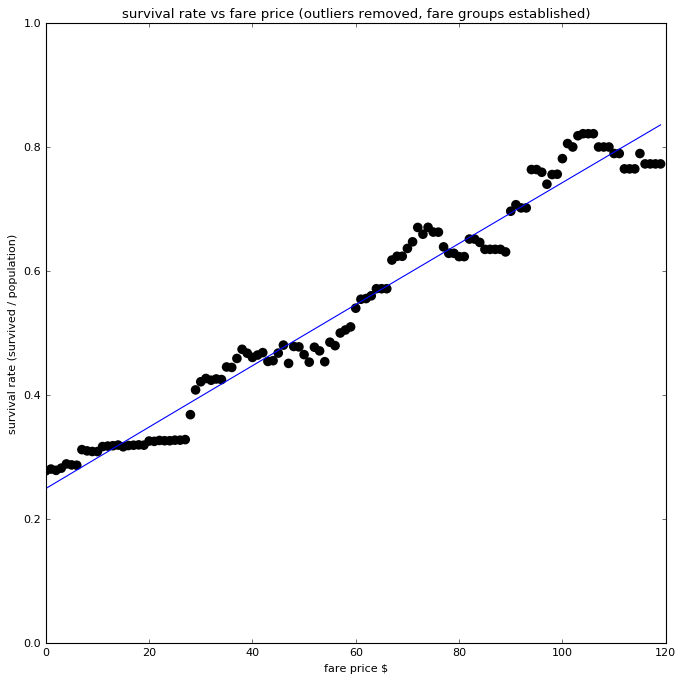

In [18]:
y = train_df["Fare"].values
print("max: "+str(max(y)))
print("min: "+str(min(y)))

import numpy as np
from sklearn.metrics import r2_score
fare_survive_freq = []
fare_death_freq   = []
fares = []
fareprice = 0
print("wtf")
while fareprice < 120:
    fares.append(fareprice)
    fare_survive_freq.append(0)
    fare_death_freq.append(0)
    survive_values = train_df["Survived"][abs(train_df["Fare"] - fareprice) < 20].values
    for survive in survive_values:
        if survive == True:
            fare_survive_freq[int(fareprice)] += 1
        else:
            fare_death_freq[int(fareprice)] += 1
    fareprice+=1

print(fare_survive_freq)  
print(fare_death_freq)
    
colors = []
survival_ratio = []
fareprice = 0.0
while fareprice < 120:
    if fare_survive_freq[int(fareprice)] > 0:
        survival_ratio.append(float(fare_survive_freq[int(fareprice)] / 
                                    (fare_survive_freq[int(fareprice)] + fare_death_freq[int(fareprice)])))
        colors.append("black")
    else:
        survival_ratio.append(0)
        colors.append("white")
    fareprice+=1

fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylim([0,1])
plt.xlim([0,120]);
plt.scatter(fares, survival_ratio, s = 75, c = colors, alpha = 1, lw = 0)

# lets do some investigation work
#print(np.poly1d(np.polyfit(ages, survival_ratio, 3))
plt.plot(np.unique(fares), np.poly1d(np.polyfit(fares, survival_ratio, 2))(np.unique(fares)))

def fit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

print(fit(fares, survival_ratio, 3));

plt.title("survival rate vs fare price (outliers removed, fare groups established)")
plt.ylabel("survival rate (survived / population)")
plt.xlabel("fare price $")
plt.show()

{'determination': 0.9144353024519327, 'polynomial': [0.00023972374882908948, -0.003120774403510534, -0.0025888786469073373, 0.06221630452221499, 0.3678340915162758]}


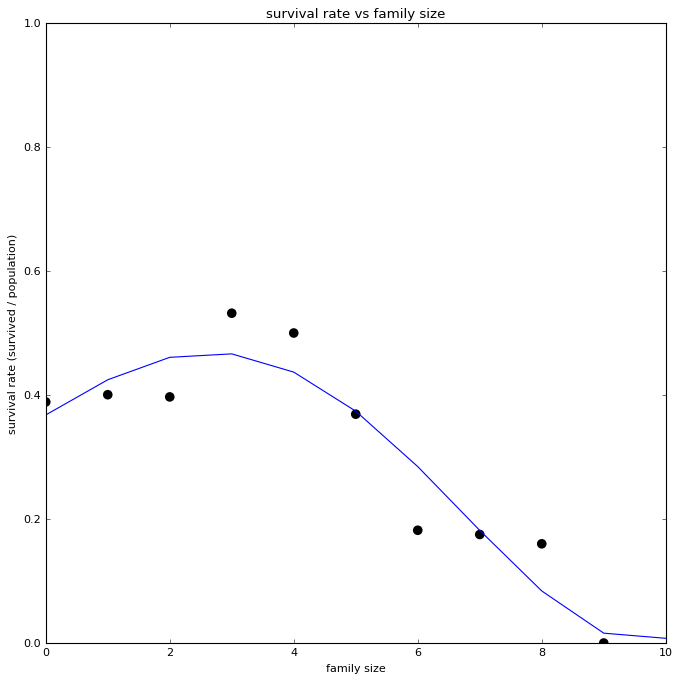

In [22]:
# we are going to do a tag team based on
proc = train_df["FamilySize"]
family_size_class = (proc).values
# print(family_size)
family_sizes = [0,1,2,3,4,5,6,7,8,9,10]
survival_freq = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
death_freq =    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for fam_size in range(0, 10):
    survive_values = train_df["Survived"][abs(train_df["FamilySize"] - fam_size) < 3].values
    for survive in survive_values:
        if survive == 1:
            survival_freq[fam_size] +=1
        else:
            death_freq[fam_size] +=1

ratio = []
colors = []
for i in range(0, len(survival_freq)):
    if survival_freq[i] > 0 or death_freq[i] > 0:
        ratio.append(float(survival_freq[i] / (death_freq[i] + survival_freq[i])))
        colors.append("Black")
    else:
        ratio.append(0)
        colors.append("White")

fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylim([0,1])
plt.xlim([0,10]);
plt.scatter(family_sizes, ratio, s = 75, c = colors, alpha = 1, lw = 0)


plt.plot(np.unique(family_sizes), np.poly1d(np.polyfit(family_sizes, ratio, 4))(np.unique(family_sizes)))
def fit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

print(fit(family_sizes, ratio, 4));

plt.title("survival rate vs family size")
plt.ylabel("survival rate (survived / population)")
plt.xlabel("family size")
plt.show()

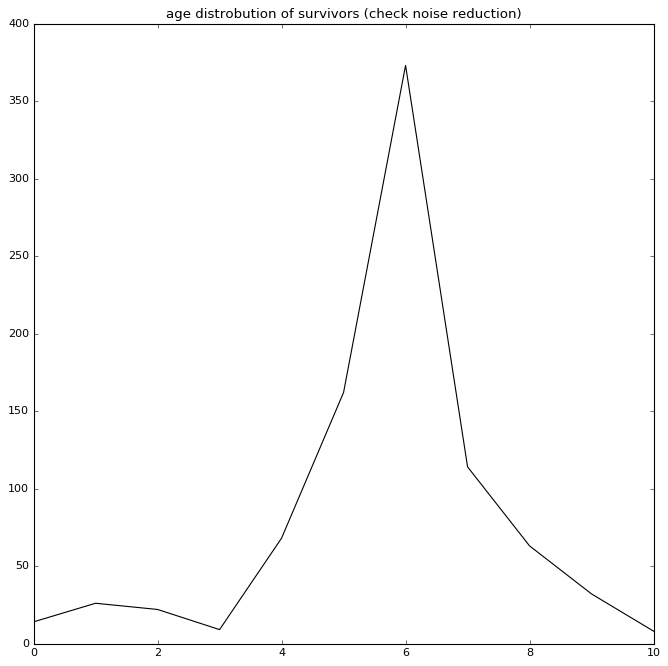

In [55]:
# as we can see from above, there is a lot of noise coming from the age, so we need to reduce the noise
age_interval_survived = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
def get_age_interval(df):
    age_interval = []
    for age in df["Age"].values:    
        if age <= 1:
            age_interval.append(1)
            age_interval_survived[0] += 1 
        elif age <= 4: 
            age_interval.append(2)
            age_interval_survived[1] += 1
        elif age <= 9: 
            age_interval.append(3)
            age_interval_survived[2] += 1
        elif age <= 13:
            age_interval.append(4)
            age_interval_survived[3] += 1
        elif age <= 18:
            age_interval.append(5)
            age_interval_survived[4] += 1
        elif age <= 25: 
            age_interval.append(6)
            age_interval_survived[5] += 1
        elif age <= 35:
            age_interval.append(7)
            age_interval_survived[6] += 1
        elif age <= 45:
            age_interval.append(8)
            age_interval_survived[7] += 1
        elif age <= 55:
            age_interval.append(9)
            age_interval_survived[8] += 1
        elif age <= 65:
            age_interval.append(10)
            age_interval_survived[9] += 1
        else:
            age_interval.append(11)
            age_interval_survived[10] += 1
    return age_interval
        
get_age_interval(train_df)
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
x = [0,1,2,3,4,5,6,7,8,9,10]
y = age_interval_survived
plt.title("age distrobution of survivors (check noise reduction)")
plt.plot(x, y, color= "black")
plt.show()

In [56]:
# lets update to our data
train_df.update(pd.DataFrame({"Age":get_age_interval(train_df)}))
test_df.update(pd.DataFrame({"Age":get_age_interval(test_df)}))
print(train_df)
print(test_df)

     PassengerId  Survived  Pclass Name Sex   Age  SibSp  Parch  \
0              1         0       3    1   0   6.0      1      0   
1              2         1       1    0   1   8.0      1      0   
2              3         1       3    3   1   7.0      0      0   
3              4         1       1    0   1   7.0      1      0   
4              5         0       3    1   0   7.0      0      0   
5              6         0       3    1   0   7.0      0      0   
6              7         0       1    1   0   9.0      0      0   
7              8         0       3    2   0   2.0      3      1   
8              9         1       3    0   1   7.0      0      2   
9             10         1       2    0   1   5.0      1      0   
10            11         1       3    3   1   2.0      1      1   
11            12         1       1    3   1  10.0      0      0   
12            13         0       3    1   0   6.0      0      0   
13            14         0       3    1   0   8.0      1      

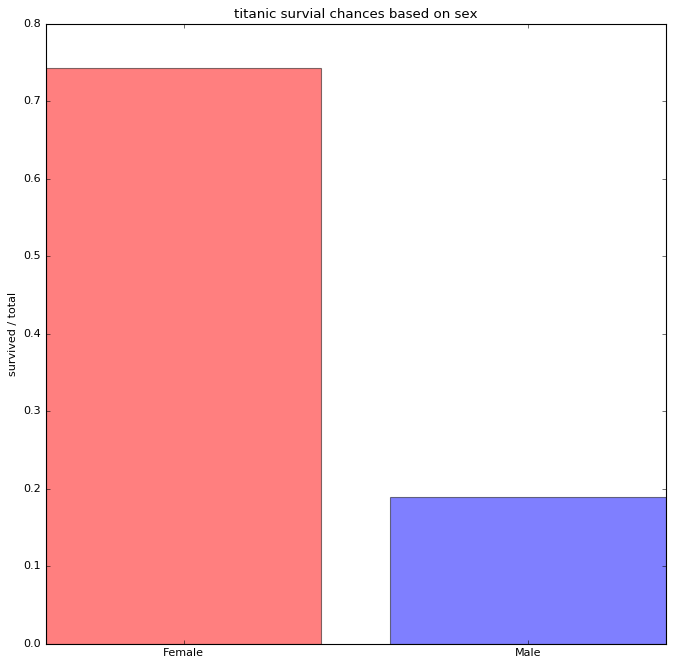

In [65]:
# lets visualize just the sex
male_sfreq = 0
female_sfreq = 0
male_dfreq = 0
female_dfreq =0

males = train_df["Survived"][train_df["Sex"] == 0]
for i in males:
    if i == 1:
        male_sfreq+=1
    else:
        male_dfreq+=1
        
females = train_df["Survived"][train_df["Sex"] == 1]
for i in females:
    if i == 1:
        female_sfreq+=1
    else:
        female_dfreq+=1
    
objects = ('Female', 'Male')
y_pos = np.arange(len(objects))
performance = [float(female_sfreq / (female_sfreq + female_dfreq)), 
                  float(male_sfreq / (male_sfreq + male_dfreq))]
 
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(y_pos, performance, align='center', alpha=0.5, color = ["red","blue"])
plt.xticks(y_pos, objects)
plt.ylabel('survived / total')
plt.title('titanic survial chances based on sex')
 
plt.show()

In [58]:
# train model using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
np.random.seed(0)
print(train_df.columns)

seed = 7
features = ["Age","Pclass","FamilySize","FarePerPerson","Name","AgeClass","Fare","Sex","SibSp","Parch","Cabin","Embarked","Single","NameLength","FareType"]
X_train, X_test, y_train, y_test = train_test_split(train_df[features], train_df["Survived"], test_size = 0.33, random_state=seed)

# lets create our random forest pipeline
rf_pipeline = make_pipeline(Imputer(), RandomForestClassifier(n_jobs=2, criterion="gini", max_leaf_nodes = 15, n_estimators= 32, min_samples_leaf= 3,
                             max_depth= 3, min_samples_split= 5))
rf_pipeline.fit(X_train, y_train)

# cross validation + param tweaking
rf_preds = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, rf_preds)
print(accuracy)
print(rf_preds)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'NameLength',
       'FamilySize', 'AgeClass', 'FarePerPerson', 'Single', 'FareType'],
      dtype='object')
0.7932203389830509
[0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1
 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0
 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0
 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1]


In [59]:
# gradient boosting classifier pipeline
from sklearn.ensemble import GradientBoostingClassifier
gbc_pipeline = make_pipeline(Imputer(), GradientBoostingClassifier())
gbc_pipeline.fit(X_train, y_train)
gbc_preds = gbc_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, gbc_preds)
print(accuracy)
print(gbc_preds)

0.8
[0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0
 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0
 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1]


In [60]:
# xgb classifier pipeline
from xgboost import XGBClassifier
xgbc_pipeline = make_pipeline(Imputer(), XGBClassifier())
xgbc_pipeline.fit(X_train, y_train)
xgbc_preds = xgbc_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, xgbc_preds)
print(accuracy)
print(xgbc_preds)

0.7932203389830509
[0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0
 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0
 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1]


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [61]:
# grab predictions from the model with highest accuracy
print(train_df[features])
gbc_pipeline.fit(train_df[features], train_df["Survived"])
predictions = gbc_pipeline.predict(test_df[features])

      Age  Pclass  FamilySize  FarePerPerson Name    AgeClass      Fare Sex  \
0     6.0       3           1       3.625000    1   66.000000    7.2500   0   
1     8.0       1           1      35.641650    0   38.000000   71.2833   1   
2     7.0       3           0       7.925000    3   78.000000    7.9250   1   
3     7.0       1           1      26.550000    0   35.000000   53.1000   1   
4     7.0       3           0       8.050000    1  105.000000    8.0500   0   
5     7.0       3           0       8.458300    1   89.097353    8.4583   0   
6     9.0       1           0      51.862500    1   54.000000   51.8625   0   
7     2.0       3           4       4.215000    2    6.000000   21.0750   0   
8     7.0       3           2       3.711100    0   81.000000   11.1333   1   
9     5.0       2           1      15.035400    0   28.000000   30.0708   1   
10    2.0       3           2       5.566667    3   12.000000   16.7000   1   
11   10.0       1           0      26.550000    3   

In [62]:
# postprocess and turn df into csv file
predictions_df = pd.DataFrame(
                                data={
                                    "PassengerId":test_df["PassengerId"].values,
                                    "Survived":predictions
                                }
                             )
print(predictions_df)
predictions_df.to_csv("sub.csv", encoding='utf-8', index=False)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
5            897         0
6            898         0
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         0
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         1
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         0
3